# Politicians on Wikipedia

<img src="wikipedia.jpg">

# Required Libraries

In [193]:
import pandas as pd
import numpy as np
import wikipedia
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import wordcloud
from sklearn.feature_extraction import text
warnings.filterwarnings("ignore")
%matplotlib inline

# Methods to be used

In [151]:
def get_top(sort_by, top_x=10):
    """ Returns top_x rows of dataframe sorted by column {sorted_by}
    """
    return data.sort_values(sort_by,ascending=False).head(top_x)

def distribution_plot(column, x_scale="linear", y_scale="linear"):
    grid = sns.distplot(data[column])       
#     grid.set(xscale="log")

def flatten(data, col):
    f_list = [item for sublist in data[col].values for item in sublist]
    return f_list

def wordcloud_col(col = "occupation"):
    lst = flatten(data, col)
    if col == "occupation":
        lst = [i for i in lst if i != "politician"] 
    counts = Counter(lst)
    wc = wordcloud.WordCloud(scale=1, width=800, height=400, background_color="white").generate_from_frequencies(counts)
    plt.figure( figsize=(16,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    
def bar_col(col = "party"):
    lst = flatten(data, col)
    if col == "occupation":
        lst = [i for i in lst if i != "politician"] 
    counts = Counter(lst).most_common(10)
    df = pd.DataFrame(counts, columns=['label', 'value'])
    sns.barplot(df["value"], df["label"])
    
def word_cloud_txt(df):
    wc = wordcloud.WordCloud(width=800, height=400).generate(" ".join(df["page_content"].values))
    plt.figure( figsize=(16,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    
def plot_gender_over_time(data):
    lst = []
    for year in sorted(data["entered"].unique()):
        df = data[data["entered"] == year]
        counts = df["gender"].value_counts().to_dict()
        if "female" in counts.keys():
            lst.append([year, counts["male"], counts["female"]])
        else:
            lst.append([year, counts["male"], 0])
    df = pd.DataFrame(lst, columns = ["year", "males", "females"])
    df = pd.melt(df, id_vars=["year"], value_vars=["males", "females"])
    # print(df)
    g = sns.factorplot(x="year", y="value", hue='variable', data=df)
    g.set_xticklabels(rotation=90)
    
def add_page_content(df,gender):
    """ Returns contents of wikipedia pages from the dataframe
    """
    df = df[df["gender"] == gender]
    df["page_content"] = df["WikiURL"].apply(lambda x: page_content(x))
    return df

def page_content(url):
    try:
        return wikipedia.page(url.split("/")[-1]).content.replace("\n","").replace("==", "")
    except:
        return ""

def add_doc_length(df):
    df["n_terms"] = df["page_content"].apply(lambda x: len(x))
    return df

# Loading Data

In [3]:
data = pd.read_pickle("german_politicians")

In [4]:
data.head()

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
7,http://en.wikipedia.org/wiki/Otto_Hoetzsch,male,[ hoetzsch otto ],[],[german],2011,[politician],1,0,2.021104e-19,1652.0
113,http://en.wikipedia.org/wiki/Adolf_Grimme,male,"[ adolf grimme , grimme adolf ]",[],[german],2012,[politician],3,2,2.530002e-05,2376.0
127,http://en.wikipedia.org/wiki/Heinz_Jost,male,[ jost heinz ],[],[german],2009,"[nazism, politician]",4,0,-1.456437e-19,32143.0
132,http://en.wikipedia.org/wiki/Heinz_Neukirchen,male,"[ heinz neukirchen , neukirchen heinz ]",[],[german],2009,[politician],1,1,9.096369e-08,2268.0
158,http://en.wikipedia.org/wiki/Wilhelm_von_Bismarck,male,"[ wilhelm , wilhelm otto albrecht von bismarc...",[],[german],2011,[politician],2,2,7.461692e-04,19536.0


# Gender distribution

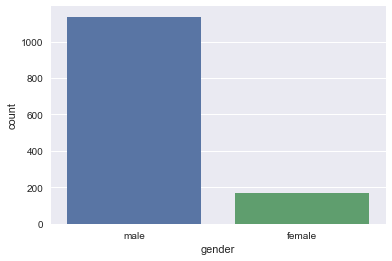

In [16]:
sns.countplot(x="gender", data=data)

# Politicians "entering" Wikipedia over time by gender

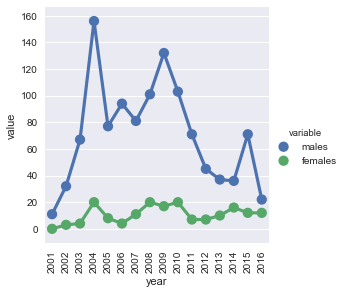

In [57]:
plot_gender_over_time(data)

# Professions

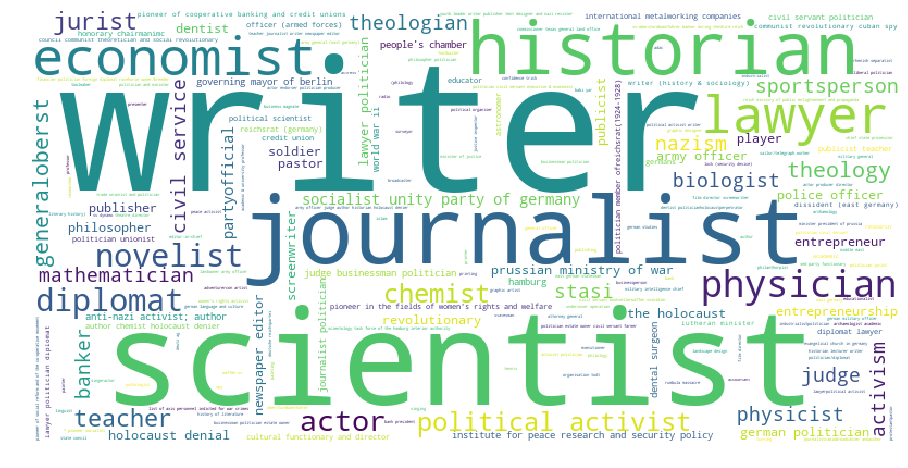

In [148]:
wordcloud_col()

In [159]:
bar_col()

# Most links from other polititians

In [31]:
get_top("in_degree", top_x=5)

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
4526,http://en.wikipedia.org/wiki/Adolf_Hitler,male,[ adolf hitler ],[ nazi party ],"[austrian, german]",2001,"[writer, politician]",35,470,0.067276,10405306.0
262,http://en.wikipedia.org/wiki/Angela_Merkel,female,[ angela merkel ],"[ democratic awakening , christian democratic...",[german],2002,"[politician, chemist, scientist]",51,205,0.050544,2404469.0
25707,http://en.wikipedia.org/wiki/Heinrich_Himmler,male,[],[ nazi party ],[german],2001,[politician],18,109,0.011311,1752731.0
21256,http://en.wikipedia.org/wiki/Otto_von_Bismarck,male,[ otto von bismarck ],[ independent politician ],[german],2001,"[politician, writer]",16,108,0.014413,1176348.0
10002,http://en.wikipedia.org/wiki/Helmut_Kohl,male,[ helmut kohl ],[ christian democratic union of germany ],[german],2002,[politician],33,87,0.032111,293055.0


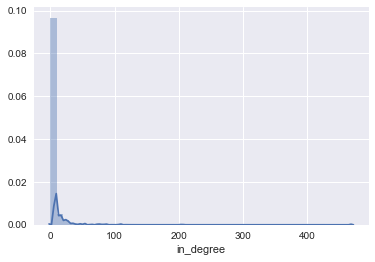

In [61]:
# sns.countplot(x="gender", data=data)
distribution_plot("in_degree")

# Most links to other politicians

In [32]:
get_top("out_degree", top_x=5)

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
262,http://en.wikipedia.org/wiki/Angela_Merkel,female,[ angela merkel ],"[ democratic awakening , christian democratic...",[german],2002,"[politician, chemist, scientist]",51,205,0.050544,2404469.0
35030,http://en.wikipedia.org/wiki/Richard_von_Weizs...,male,[ baron richard von weizsäcker ],[ christian democratic union of germany ],[german],2003,[politician],44,19,0.003132,70862.0
11078,http://en.wikipedia.org/wiki/Frank-Walter_Stei...,male,[ frank-walter steinmeier ],[ social democratic party of germany ],[german],2005,[politician],42,40,0.005699,88315.0
37847,http://en.wikipedia.org/wiki/Gerhard_Schröder,male,[ gerhard schröder ],[ social democratic party of germany ],[german],2002,[politician],41,85,0.027715,210205.0
11132,http://en.wikipedia.org/wiki/Martin_Schulz,male,[ martin schulz ],"[ social democratic party of germany , party ...",[german],2003,[politician],39,28,0.003767,261551.0


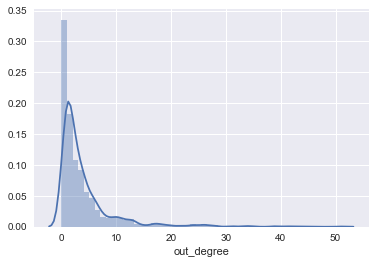

In [44]:
distribution_plot("out_degree")

# Number of views

In [46]:
get_top("views", top_x=5)

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views
4526,http://en.wikipedia.org/wiki/Adolf_Hitler,male,[ adolf hitler ],[ nazi party ],"[austrian, german]",2001,"[writer, politician]",35,470,0.067276,10405306.0
262,http://en.wikipedia.org/wiki/Angela_Merkel,female,[ angela merkel ],"[ democratic awakening , christian democratic...",[german],2002,"[politician, chemist, scientist]",51,205,0.050544,2404469.0
5475,http://en.wikipedia.org/wiki/Joseph_Goebbels,male,[],[ nazi party ],[german],2001,[politician],24,75,0.015818,1867025.0
25707,http://en.wikipedia.org/wiki/Heinrich_Himmler,male,[],[ nazi party ],[german],2001,[politician],18,109,0.011311,1752731.0
37017,"http://en.wikipedia.org/wiki/Wilhelm_II,_Germa...",male,"[ wilhelm ii , frederick william victor albert ]",[],[german],2002,[politician],25,51,0.011296,1745370.0


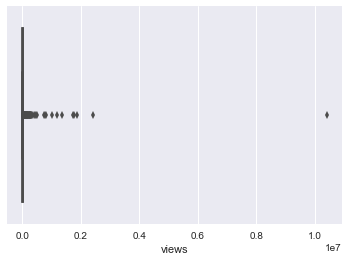

In [64]:
sns.boxplot(data["views"])

# Relationships between variables

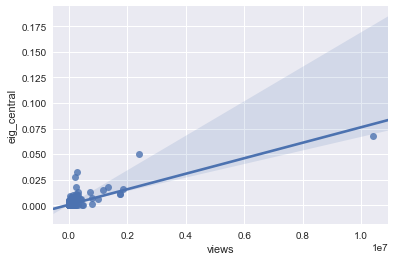

In [66]:
sns.regplot("views","eig_central", data=data)

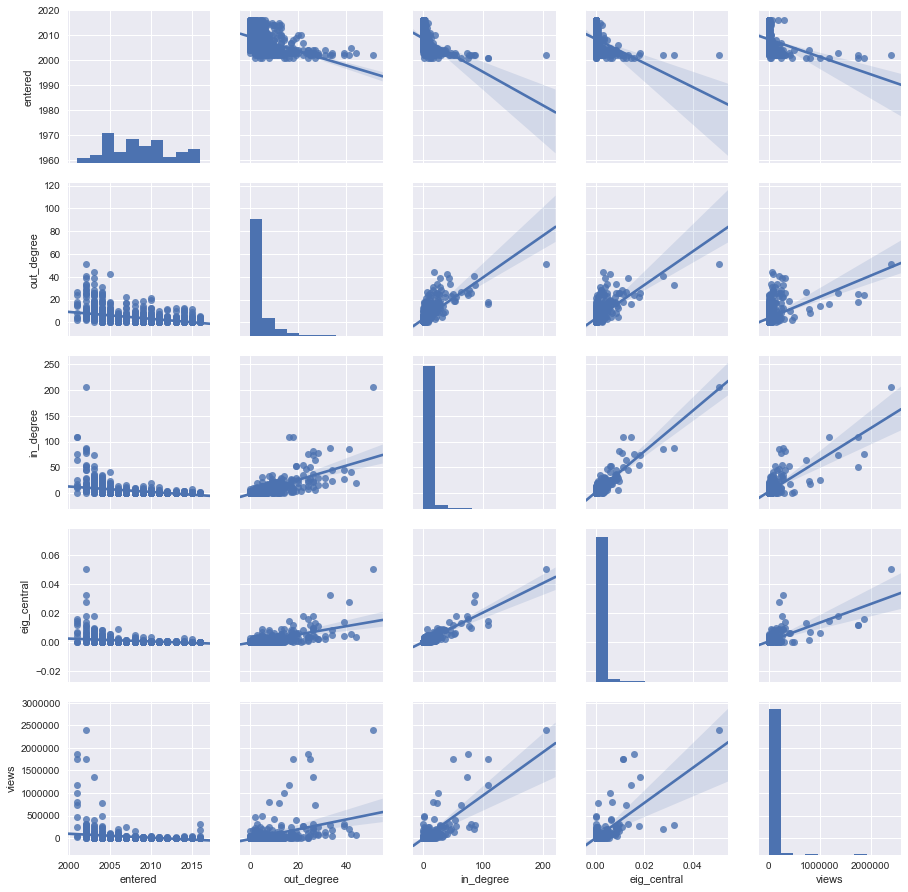

In [79]:
data2 = data.drop(4526)
data2
sns.pairplot(data2, kind='reg')

# How does this look when we take gender into account?

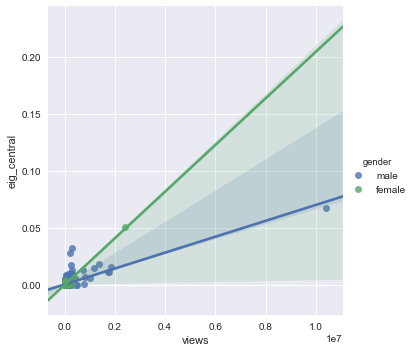

In [157]:
sns.lmplot("views","eig_central", hue="gender", data=data)

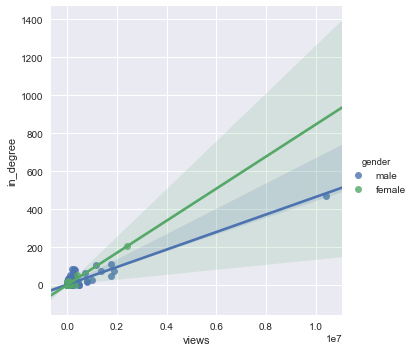

In [158]:
sns.lmplot("views","in_degree", hue="gender", data=data)

# Using the Wikipedia API

 <img src="api.png">

# Example

In [81]:
wiki_page = wikipedia.page("Barack_Obama")

#### Page Title

In [82]:
wiki_page.title

'Aleksandar Vučić'

#### Page URL

In [83]:
wiki_page.url

'https://en.wikipedia.org/wiki/Aleksandar_Vu%C4%8Di%C4%87'

#### Images on Page (first 10)

In [84]:
wiki_page.images[:10]

['https://upload.wikimedia.org/wikipedia/commons/6/67/Aleksandar_Vu%C4%8Di%C4%87%2C_2017.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/1/11/Civil_Flag_of_Serbia.svg',
 'https://upload.wikimedia.org/wikipedia/commons/1/1c/Flag_of_the_Socialist_Republic_of_Serbia.svg',
 'https://upload.wikimedia.org/wikipedia/commons/f/ff/Flag_of_Serbia.svg',
 'https://upload.wikimedia.org/wikipedia/commons/f/fc/Flag_of_Serbia_%281992-2004%29.svg',
 'https://upload.wikimedia.org/wikipedia/commons/1/1c/Flag_of_the_Socialist_Republic_of_Serbia.svg',
 'https://upload.wikimedia.org/wikipedia/commons/3/3e/Presidential_Standard_of_Serbia.svg',
 'https://upload.wikimedia.org/wikipedia/commons/4/45/Secretary_of_Defense_Leon_E._Panetta%2C_right%2C_escorts_Serbia%27s_Minister_of_Defense_Aleksandar_Vucic_through_an_honor_cordon_and_into_the_Pentagon_on_Dec_121207-D-NI589-020.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/7/7c/Signature_Aleksandar_Vucic.png',
 'https://upload.wikimedia.org/wikipedia

#### Page Summary

In [85]:
wiki_page.summary

'Aleksandar Vučić (Serbian Cyrillic: Александар Вучић, pronounced [aleksǎːndar ʋǔtʃitɕ], born 5 March 1970) is a Serbian politician who has been the President of Serbia since 31 May 2017. He is also the president of the Serbian Progressive Party (SNS).\nBefore his tenure as president Vučić served as the Prime Minister of Serbia in two terms from 2014-2016 and from 2016 until 2017, as well as the Deputy Prime Minister since 2012 until 2014. Furthermore, Vučić served as the member of the parliament of Serbia, Minister of Information from 1998 to 2000 and later as Minister of Defence from 2012 to 2013.\nIn April 2017, Vučić was elected President of Serbia with over 55% of the vote in the first round, thus avoiding a second round. He formally assumed office on 31 May 2017, succeeding Tomislav Nikolić. His ceremonial inauguration ceremony was held on 23 June 2017.'

#### Page Content

In [73]:
wiki_page.content

'Barack Hussein Obama II ( ( listen); born August 4, 1961) is an American politician who served as the 44th President of the United States from January 20, 2009 to January 20, 2017. The first African American to assume the presidency, he was previously the junior United States Senator from Illinois from 2005 to 2008. Before that, he served in the Illinois State Senate from 1997 until 2004.\nObama was born in 1961 in Honolulu, Hawaii, two years after the territory was admitted to the Union as the 50th state. Raised largely in Hawaii, Obama also spent one year of his childhood in Washington State and four years in Indonesia. After graduating from Columbia University in New York City in 1983, he worked as a community organizer in Chicago. In 1988 Obama enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduation, he became a civil rights attorney and professor and taught constitutional law at the University of Chicago Law School from 1

## Try it out on a page interesting to you

In [86]:
def print_wikipage_gist(page_name):
    w = wikipedia.page(page_name)
    print("Title: {} \n".format(w.title))
    print("URL: {} \n".format(w.url))
    print("Page Summary: \n {} \n".format(w.summary))
    print("Links to first 10 images: {} \n".format(w.images[:10]))

In [90]:
print_wikipage_gist("Star_Wars")

Title: Star Wars 

URL: https://en.wikipedia.org/wiki/Star_Wars 

Page Summary: 
 Star Wars is an American epic space opera media franchise, centered on a film series created by George Lucas. It depicts the adventures of various characters "a long time ago in a galaxy far, far away".
The franchise began in 1977 with the release of the film Star Wars (later subtitled Episode IV: A New Hope in 1981), which became a worldwide pop culture phenomenon. It was followed by the successful sequels The Empire Strikes Back (1980) and Return of the Jedi (1983); these three films constitute the original Star Wars trilogy. A prequel trilogy was released between 1999 and 2005, which received mixed reactions from both critics and fans. A sequel trilogy began in 2015 with the release of Star Wars: The Force Awakens and continued in 2017 with the release of Star Wars: The Last Jedi. The first eight films were nominated for Academy Awards (with wins going to the first two films released) and have been com

# Content of Wiki Pages has been downloaded (to save time)

In [93]:
f_content = pd.read_pickle("ctnt_f_politicians")
m_content = pd.read_pickle("ctnt_m_politicians")

In [92]:
f_content.head()

,WikiURL,gender,name,party,nationality,entered,occupation,out_degree,in_degree,eig_central,views,page_content
262,http://en.wikipedia.org/wiki/Angela_Merkel,female,[ angela merkel ],"[ democratic awakening , christian democratic...",[german],2002,"[politician, chemist, scientist]",51,205,5.054432e-02,2404469.0,Angela Dorothea Merkel (; German: [aŋˈɡeːla ˈm...
575,http://en.wikipedia.org/wiki/Vicky_Leandros,female,[ vicky leandros ],[],[german],2008,[politician],0,1,-2.036547e-19,59260.0,Vassiliki Papathanasiou (bornGreek: Βασιλική Π...
926,http://en.wikipedia.org/wiki/Marieluise_Beck,female,[ marieluise beck ],[ the greens ],[german],2014,[politician],13,4,1.044176e-05,3098.0,Marieluise Beck (born 25 June 1952 in Bramsche...
1138,http://en.wikipedia.org/wiki/Annkathrin_Kammeyer,female,"[ annkathrin kammeyer , kammeyer annkathrin ]",[ social democratic party of germany ],[german],2012,[politician],1,0,-1.044400e-19,1340.0,Annkathrin Kammeyer (born 12 January 1990) is ...
1408,http://en.wikipedia.org/wiki/Britta_Böhler,female,"[ britta böhler , bohler britta ]",[ groenlinks ],[german],2005,[politician],5,1,3.184073e-06,4320.0,Britta Böhler (17 July 1960 in Freiburg im Bre...


In [163]:
# data = pd.read_pickle("2016")
# german_p = []
# for index, row in data.iterrows():
#     if "german" in row["nationality"]:
#         german_p.append(row)
# pd.DataFrame(german_p)[["WikiURL","gender", "name", "party", "nationality", "entered", "occupation","out_degree", "in_degree", "eig_central", "views"]].to_pickle("german_politicians")
# # pd.DataFrame(germans).head()[["WikiURL","gender", "name", "party", "nationality", "entered", "occupation","out_degree", "in_degree", "eig_central"]]

# Wordcloud Female Politicians

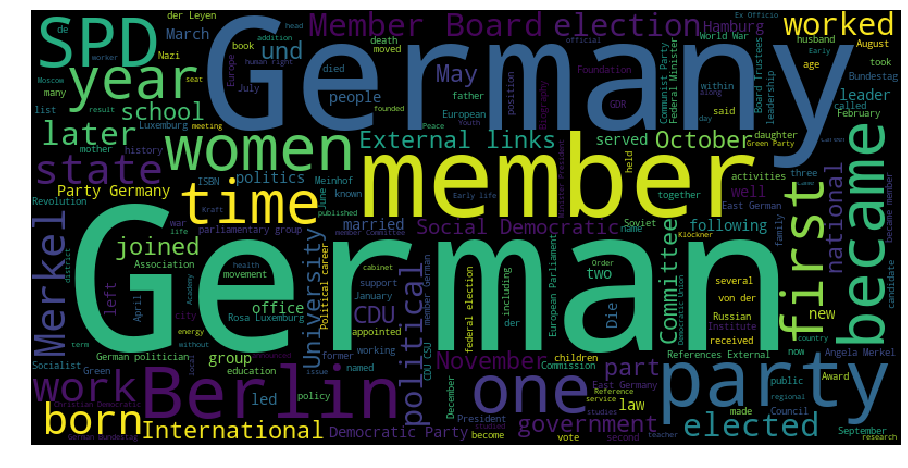

In [152]:
word_cloud_txt(f_content)

# Wordcloud Male Politicians

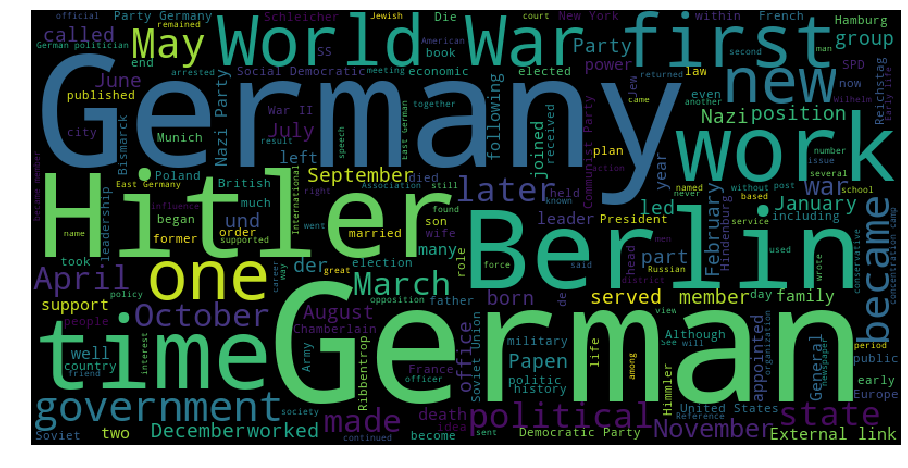

In [153]:
word_cloud_txt(m_content)

In [67]:
m_content = add_doc_length(m_content)
f_content = add_doc_length(f_content)
m_content.to_pickle("ctnt_m_politicians")
f_content.to_pickle("ctnt_f_politicians")

# Page length (number of words) Male vs Female

In [104]:
m_content["n_terms"].describe()

count      1136.000000
mean       6356.247359
std       11212.024380
min           0.000000
25%        1674.500000
50%        3461.500000
75%        6655.250000
max      140284.000000
Name: n_terms, dtype: float64

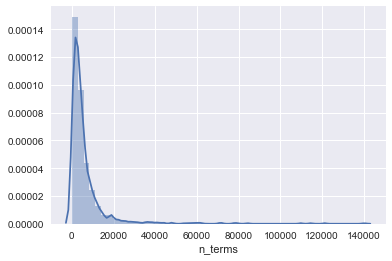

In [111]:
sns.distplot(m_content["n_terms"])

In [108]:
f_content["n_terms"].describe()

count      171.000000
mean      4784.608187
std       6029.411471
min          0.000000
25%       1481.500000
50%       3139.000000
75%       6124.500000
max      46102.000000
Name: n_terms, dtype: float64

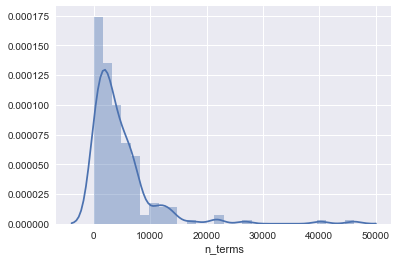

In [113]:
sns.distplot(f_content["n_terms"])

In [98]:
def concat_docs(df):
    return " ".join(df["page_content"].values.flatten())

In [174]:
# text.TfidfVectorizer()
# def tokenize(df):
#     df["doc_tokens"] = df["page_content"].apply(lambda x: x.split(" "))
    

In [172]:
tfidf = text.TfidfVectorizer(stop_words='english')

In [195]:
# vectorize = tfidf.transform(f_content["page_content"].values[:10])
# X_vec = tfidf.fit_transform(f_content["page_content"].values) 
# X = X_vec.toarray()
# feature_array = np.array(tfidf.get_feature_names())
# tfidf_sorting = np.argsort(X).flatten()[::-1]
# n = 20
# top_n = feature_array[tfidf_sorting][:n]
# top_n

def get_top_x_tfidf(df, n):
    X_vec = tfidf.fit_transform(df["page_content"].values) 
    X = X_vec.toarray()
    feature_array = np.array(tfidf.get_feature_names())
    tfidf_sorting = np.argsort(X).flatten()[::-1]
    return feature_array[tfidf_sorting][:n]

In [196]:
get_top_x_tfidf(f_content, 20)

array(['klöckner', 'cdu', 'rhineland', 'palatinate', 'kreuznach',
       'consumer', 'bad', 'votes', 'member', 'board', 'wine', 'protection',
       '2011', 'state', 'elections', 'julia', 'german', 'csu', 'federal',
       'parliamentary'], 
      dtype='<U30')

In [200]:
get_top_x_tfidf(m_content.head(300), 20)

array(['lichtenberg', 'bernhard', 'stühlmeyer', 'cathedral', 'ludger',
       'berlin', 'hof', 'hedwig', 'mich', 'priest', 'st', 'choir', 'gott',
       'euthanasia', 'catholic', 'church', 'den', 'pastor', 'bishop',
       'song'], 
      dtype='<U38')

In [ ]:
m